<a href="https://colab.research.google.com/github/akshaypat444/pytorch_experiments/blob/main/Pytorch_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tensor Operations


In [1]:
import torch
import numpy as np

In [2]:
data = [[1,2], [3,4]]
data

[[1, 2], [3, 4]]

In [4]:
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [5]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [9]:
tensor = torch.ones(4,4)

In [10]:
tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [11]:
tensor[0]

tensor([1., 1., 1., 1.])

In [12]:
tensor[:, 0]

tensor([1., 1., 1., 1.])

In [16]:
tensor[..., -1]

tensor([1., 1., 1., 1.])

In [14]:
tensor[:, -1]

tensor([1., 1., 1., 1.])

In [19]:
tensor[:, 1] = 0
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [21]:
tensor[:, -1] = -9
tensor

tensor([[ 1.,  0.,  1., -9.],
        [ 1.,  0.,  1., -9.],
        [ 1.,  0.,  1., -9.],
        [ 1.,  0.,  1., -9.]])

In [22]:
tensor[:, -2] = -8
tensor

tensor([[ 1.,  0., -8., -9.],
        [ 1.,  0., -8., -9.],
        [ 1.,  0., -8., -9.],
        [ 1.,  0., -8., -9.]])

In [23]:
tensor[3, 2] = -3
tensor

tensor([[ 1.,  0., -8., -9.],
        [ 1.,  0., -8., -9.],
        [ 1.,  0., -8., -9.],
        [ 1.,  0., -3., -9.]])

In [24]:
tensor.shape

torch.Size([4, 4])

In [29]:
# Concat the rows. i.e. 0th dimension
torch.cat([tensor, tensor.T, tensor], dim=0)


# Concat the columns i.e. 1st dimention
torch.cat([tensor, tensor.T, tensor], dim=1)



tensor([[ 1.,  0., -8., -9.,  1.,  1.,  1.,  1.,  1.,  0., -8., -9.],
        [ 1.,  0., -8., -9.,  0.,  0.,  0.,  0.,  1.,  0., -8., -9.],
        [ 1.,  0., -8., -9., -8., -8., -8., -3.,  1.,  0., -8., -9.],
        [ 1.,  0., -3., -9., -9., -9., -9., -9.,  1.,  0., -3., -9.]])

In [39]:
x = [[1,2], [3,4]]
y = [1, 1]

In [40]:
x_t = torch.tensor(x)
y_t = torch.tensor(y)

In [41]:
x_t

tensor([[1, 2],
        [3, 4]])

In [42]:
y_t

tensor([1, 1])

In [47]:
x_t @ y_t

tensor([3, 7])

## Datasets and Dataloaders

In [48]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)


testing_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:07<00:00, 3692705.99it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 347572.46it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:03<00:00, 1172383.26it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15057375.87it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [51]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [52]:
testing_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

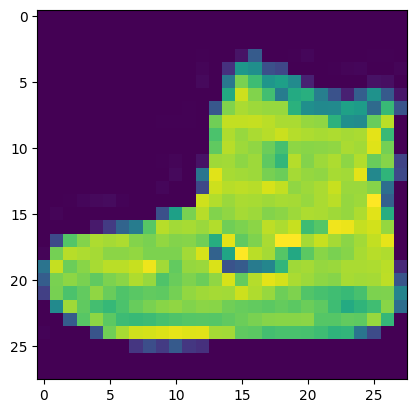

In [63]:
plt.imshow(training_data[0][0].squeeze())

In [64]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

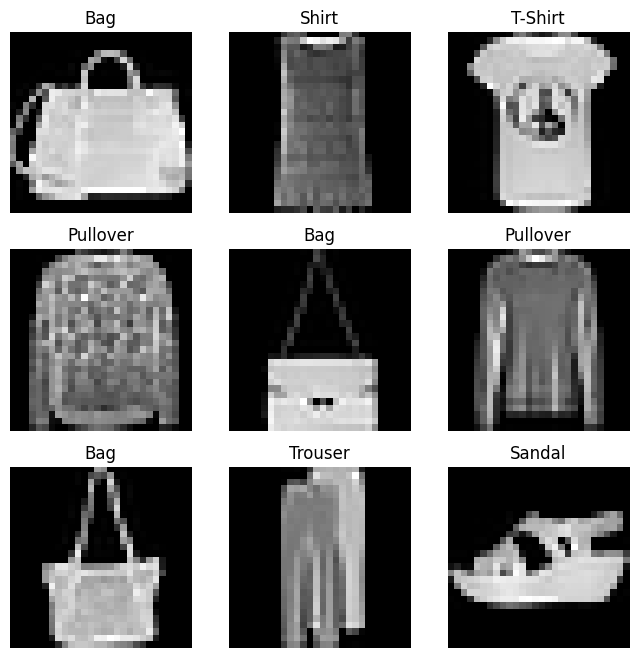

In [66]:
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3

for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()